# Import Core Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [40]:
%run load_nectec_dataset.ipynb

Loading 3001's data
Loading 3002's data
Loading 3004's data
Loading 3005's data
Finished loading


# Data Preprocessing

In [47]:
%run preprocess_for_SVM.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [43]:
print(X_all.shape, y_all.shape)

(11847, 3) (11847,)


# Group Data by Label and Normalize Data

In [15]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [16]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [44]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

In [45]:
print(X_label.shape)

(4, 4)


## Show Plot for each Activity and Subject

plotting  sit
(3, 922)
(3, 269)
(3, 899)
(3, 89)


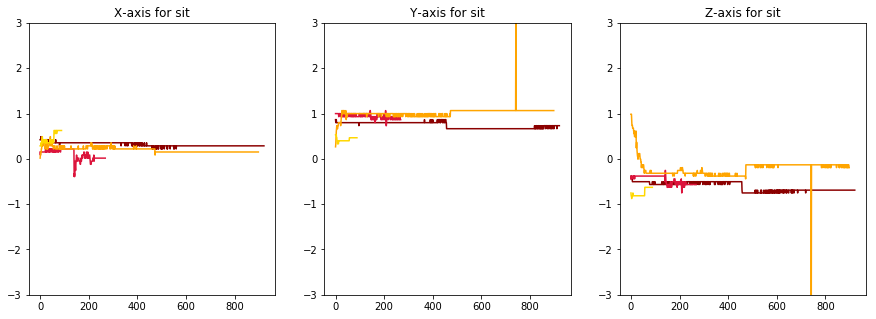

plotting  sleep
(3, 881)
(3, 934)
(3, 868)
(3, 918)


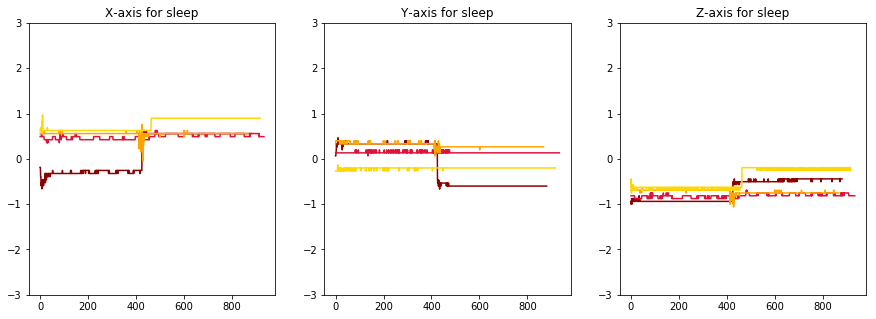

plotting  stand
(3, 1408)
(3, 1325)
(3, 1365)
(3, 1205)


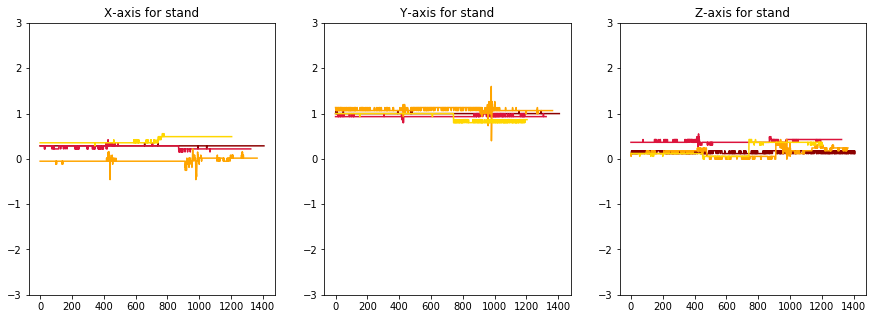

plotting  walk
(3, 477)
(3, 287)
(0,)


IndexError: index 0 is out of bounds for axis 0 with size 0

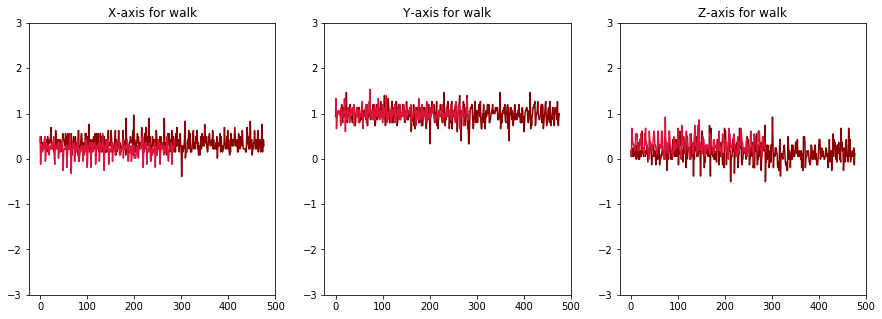

In [48]:
plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [10]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

(27949, 3)


# Apply PCA and LDA

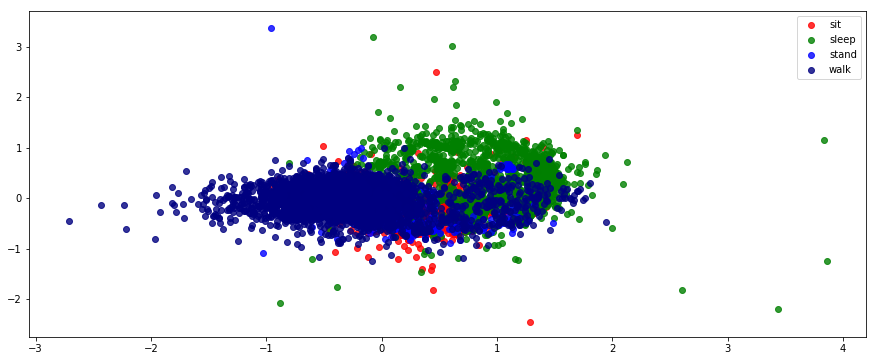

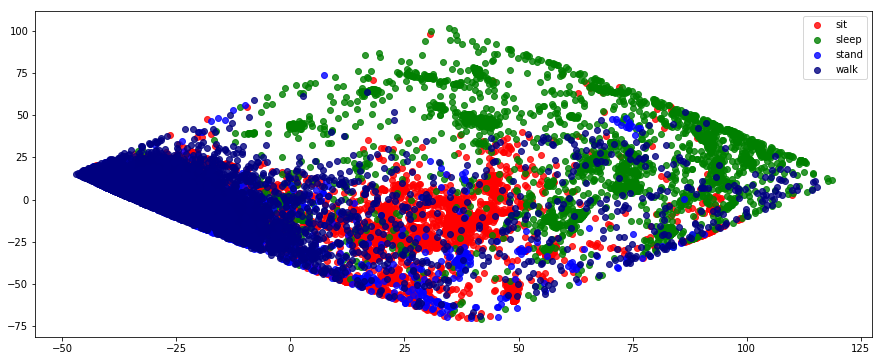

In [11]:
# apply PCA and LDA to X_norm and rpy
X_pca = apply_pca(X_all, y_all, label_list)
rpy_pca = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [13]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [14]:
print(X_svm.shape, y_svm.shape)

(24645, 180) (24645,)


# Reshape Data (Impure Label)

In [15]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [16]:
print(X_impure.shape, y_impure.shape)

(27890, 180) (27890,)


# Split Train and Test Set

In [68]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(22312, 180)
(5578, 180)


In [69]:
print(X_train.shape)
print(X_test.shape)

(19716, 180)
(4929, 180)


# SVM

In [70]:
svm_model = svm_classifier(X_train, y_train)
print("Finished training")

Finished training


In [71]:
y_pred_svm = svm_model.predict(X_test)

In [72]:
svm_model_2 = svm_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [75]:
y_pred_svm_2 = svm_model_2.predict(X_te)

## SVM Evaluation

In [22]:
%run eval_score.ipynb

In [23]:
LABELS = ['sit','sleep','stand','walk']

0.8727936701156421


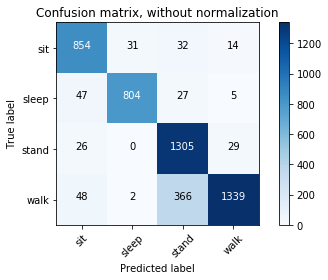

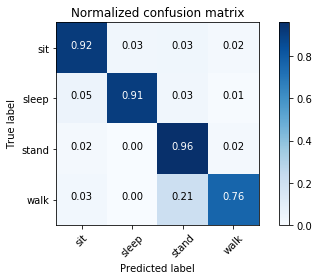

              precision    recall  f1-score   support

         sit       0.88      0.92      0.90       931
       sleep       0.96      0.91      0.93       883
       stand       0.75      0.96      0.84      1360
        walk       0.97      0.76      0.85      1755

   micro avg       0.87      0.87      0.87      4929
   macro avg       0.89      0.89      0.88      4929
weighted avg       0.89      0.87      0.87      4929



In [73]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc)

show_conf_matrix(y_test, y_pred_svm, LABELS)
show_clf_report(y_test, y_pred_svm, LABELS)

0.8334528504840445


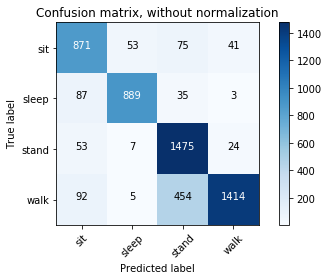

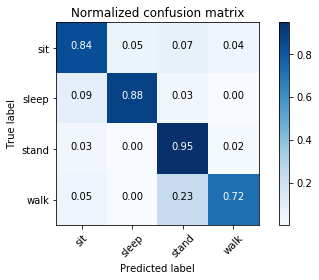

              precision    recall  f1-score   support

         sit       0.79      0.84      0.81      1040
       sleep       0.93      0.88      0.90      1014
       stand       0.72      0.95      0.82      1559
        walk       0.95      0.72      0.82      1965

   micro avg       0.83      0.83      0.83      5578
   macro avg       0.85      0.84      0.84      5578
weighted avg       0.85      0.83      0.83      5578



In [76]:
acc = accuracy_score(y_te, y_pred_svm_2)
print(acc)

show_conf_matrix(y_te, y_pred_svm_2, LABELS)
show_clf_report(y_te, y_pred_svm_2, LABELS)

# Walk Algorithm

In [25]:
%run classifier_alg.ipynb

In [26]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

## Walk Algorithm Evaluation

In [27]:
walk_lbl = ['NaN','walk']

0.9217503309599628


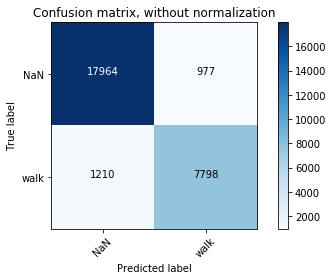

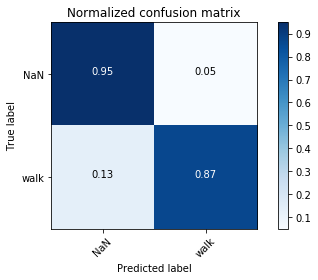

              precision    recall  f1-score   support

         NaN       0.94      0.95      0.94     18941
        walk       0.89      0.87      0.88      9008

   micro avg       0.92      0.92      0.92     27949
   macro avg       0.91      0.91      0.91     27949
weighted avg       0.92      0.92      0.92     27949



In [28]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [29]:
y_pred_new = combine(X_test, y_pred_svm)

0.9081687855017582


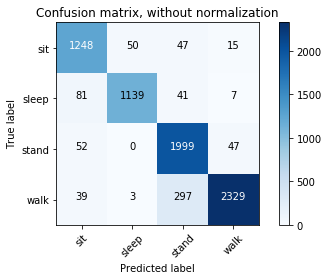

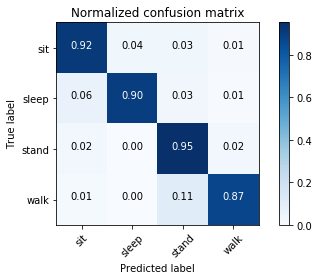

              precision    recall  f1-score   support

         sit       0.88      0.92      0.90      1360
       sleep       0.96      0.90      0.93      1268
       stand       0.84      0.95      0.89      2098
        walk       0.97      0.87      0.92      2668

   micro avg       0.91      0.91      0.91      7394
   macro avg       0.91      0.91      0.91      7394
weighted avg       0.91      0.91      0.91      7394



In [30]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subject

Loading 4001's data
Finished prediction


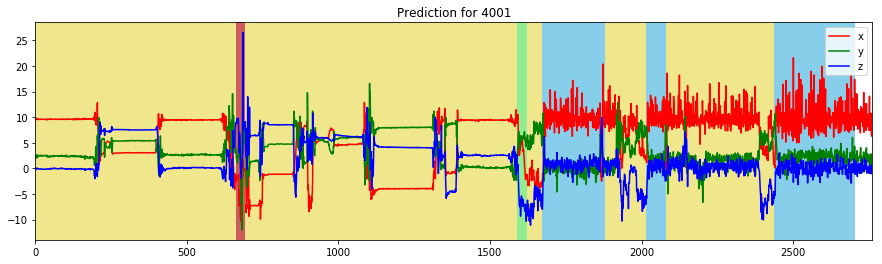

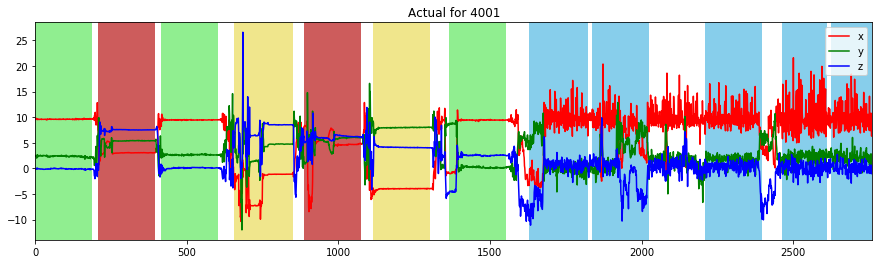

Loading 1007's data
Finished prediction


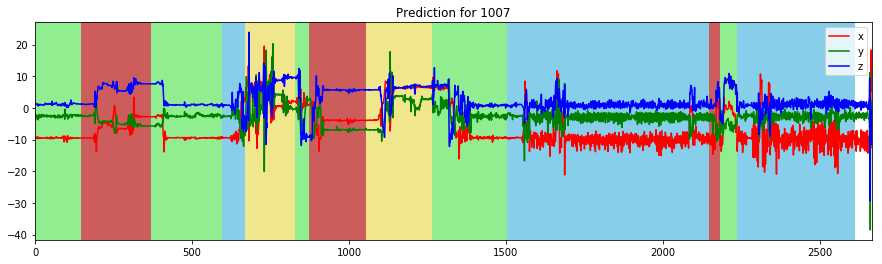

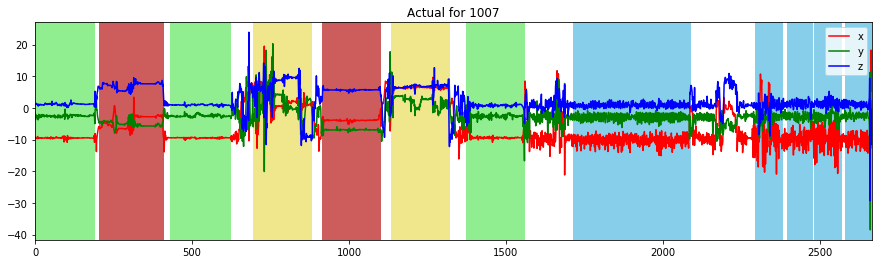

Loading 1008's data
Finished prediction


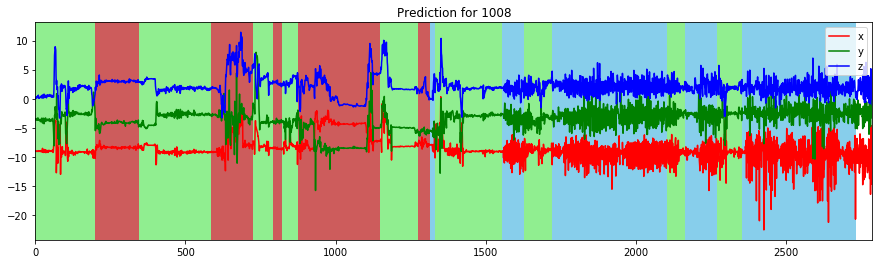

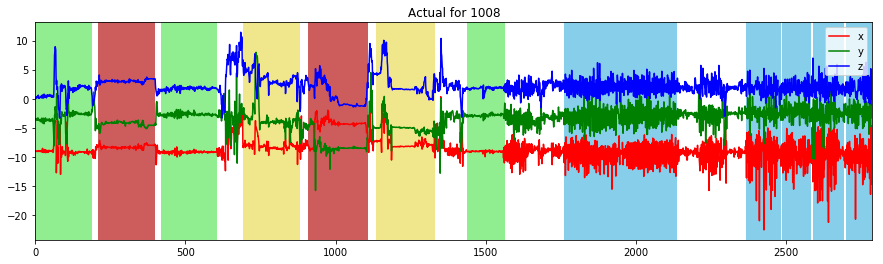

Loading 2002's data
Finished prediction


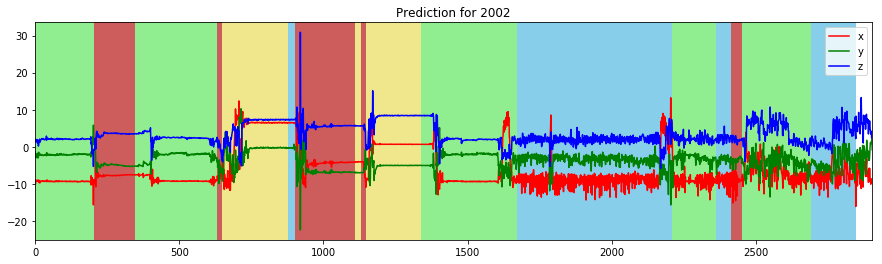

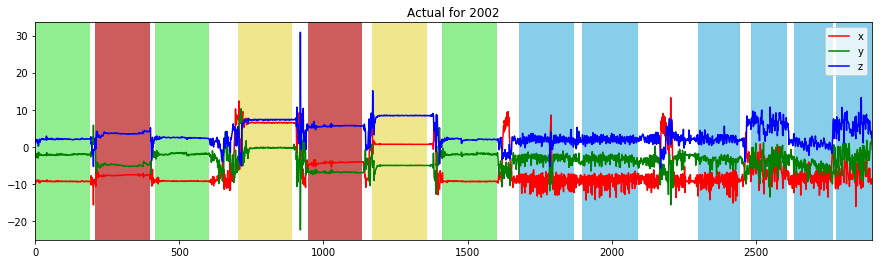

In [67]:
%run test_SVM_model.ipynb

# Display Table

In [33]:
from prettytable import PrettyTable

In [57]:
print(s)
print(df_y)

2002
                    timestamp  y_pred y_actual
0     2019-01-16 14:22:22.075       2        2
1     2019-01-16 14:22:22.237       2        2
2     2019-01-16 14:22:22.397       2        2
3     2019-01-16 14:22:22.558       2        2
4      2019-01-16 14:22:22.72       2        2
5     2019-01-16 14:22:22.882       2        2
6     2019-01-16 14:22:23.042       2        2
7     2019-01-16 14:22:23.201       2        2
8     2019-01-16 14:22:23.363       2        2
9     2019-01-16 14:22:23.522       2        2
10    2019-01-16 14:22:23.686       2        2
11    2019-01-16 14:22:23.844       2        2
12    2019-01-16 14:22:24.005       2        2
13     2019-01-16 14:22:24.17       2        2
14    2019-01-16 14:22:24.327       2        2
15    2019-01-16 14:22:24.488       2        2
16    2019-01-16 14:22:24.648       2        2
17    2019-01-16 14:22:24.809       2        2
18     2019-01-16 14:22:24.97       2        2
19    2019-01-16 14:22:25.135       2        2
20    20

In [39]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [40]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [41]:
print(t)

+-------------------------+-------------------------+-------+
|          start          |           end           |  pred |
+-------------------------+-------------------------+-------+
| 2019-01-16 14:22:22.075 |  2019-01-16 14:22:55.19 | stand |
| 2019-01-16 14:22:55.351 | 2019-01-16 14:23:21.075 |  sit  |
| 2019-01-16 14:23:21.231 | 2019-01-16 14:24:03.667 | stand |
| 2019-01-16 14:24:03.828 | 2019-01-16 14:24:03.828 |  walk |
| 2019-01-16 14:24:03.989 | 2019-01-16 14:24:04.149 | stand |
| 2019-01-16 14:24:04.312 | 2019-01-16 14:24:04.631 |  walk |
| 2019-01-16 14:24:04.793 | 2019-01-16 14:24:05.436 | stand |
| 2019-01-16 14:24:05.596 | 2019-01-16 14:24:09.617 |  walk |
| 2019-01-16 14:24:09.775 | 2019-01-16 14:24:10.257 |  sit  |
|  2019-01-16 14:24:10.42 | 2019-01-16 14:24:43.204 | sleep |
| 2019-01-16 14:24:43.375 | 2019-01-16 14:24:47.543 |  walk |
| 2019-01-16 14:24:47.701 | 2019-01-16 14:25:27.073 |  sit  |
| 2019-01-16 14:25:27.234 | 2019-01-16 14:25:57.121 | sleep |
| 2019-0

In [61]:
print(len(label_period)-1)

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

136
[['sit', 25], ['sleep', 2], ['stand', 45], ['walk', 65]]


In [66]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)-1])

In [67]:
print(tabl_act_chng)

+---------------+------------------+
|     Label     | Activities Count |
+---------------+------------------+
|      sit      |        25        |
|     sleep     |        2         |
|     stand     |        45        |
|      walk     |        65        |
|               |                  |
| total changes |       136        |
+---------------+------------------+


# Predicted Duration

In [43]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Seconds', 'Percentage'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], total_secs[i], percent_secs[i]])

tb.add_row(['', '', ''])
tb.add_row(['total', round(np.sum(total_secs), 3), round(np.sum(percent_secs), 3)])

# Actual Duration

In [44]:
df_lb = df_sid.groupby('label')
old_labels_list = ['sit', 'sleep', 'stand', 'walk']

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(old_labels_list)):
    lb = old_labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])

total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Seconds', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, dura_dict[lb], round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', round(total_dura, 3), np.sum(percent_list)])

# Activity Durations Table

In [45]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

Prediction
+-------+---------+------------+
| Label | Seconds | Percentage |
+-------+---------+------------+
|  sit  |  75.69  |   18.242   |
| sleep |  62.671 |   15.104   |
| stand | 160.383 |   38.654   |
|  walk | 116.177 |    28.0    |
|       |         |            |
| total | 414.921 |   100.0    |
+-------+---------+------------+
Actual
+-------+---------+------------+
| Label | Seconds | Percentage |
+-------+---------+------------+
|  sit  |   60.0  |   16.901   |
| sleep |   60.0  |   16.901   |
| stand |   90.0  |   25.352   |
|  walk |  145.0  |   40.845   |
|       |         |            |
| total |  355.0  |   99.999   |
+-------+---------+------------+


# Bar Chart for Every 5 Minutes

In [46]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [47]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

14:20:0.0 14:30:0.0


In [48]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [49]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

df_all

,sit,sleep,stand,walk
0,38.505,32.784,76.354,8.508
1,37.185,29.887,84.029,107.669


## Plot Bar Graph

NameError: name 'test_subj' is not defined

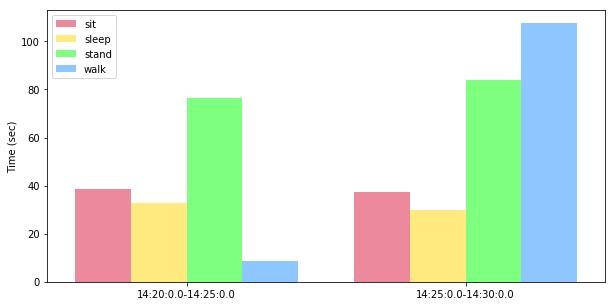

In [50]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + test_subj)

plt.show()